<center><h1><strong>Polynomial Regression</strong></h1></center>

To solve non-linear problems we use polynomial regression.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = np.linspace(-5,5,100)

noise = np.random.normal(0,15,size=len(x))
y = 2*x**3 - 3*x**2 + 5*x + 10 +noise

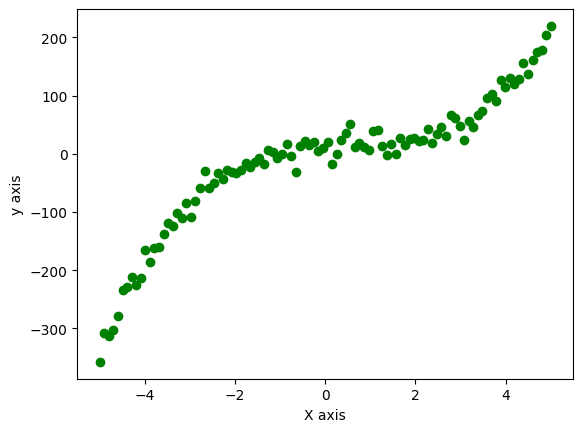

In [3]:
plt.scatter(x,y,color='green')
plt.xlabel("X axis")
plt.ylabel("y axis")
plt.show()

apply the linear regression

In [4]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x.reshape(100,1),y,test_size=0.3, random_state=42)

In [5]:
x_test

array([[ 3.38383838],
       [ 0.35353535],
       [ 2.07070707],
       [-0.45454545],
       [-0.55555556],
       [-1.06060606],
       [-2.77777778],
       [ 3.08080808],
       [-3.98989899],
       [-5.        ],
       [-3.18181818],
       [-1.96969697],
       [ 2.37373737],
       [-1.66666667],
       [ 4.09090909],
       [-4.5959596 ],
       [ 2.67676768],
       [ 2.77777778],
       [-3.78787879],
       [-1.86868687],
       [ 0.55555556],
       [ 3.88888889],
       [-2.37373737],
       [-0.75757576],
       [ 1.96969697],
       [-3.48484848],
       [-0.95959596],
       [ 4.6969697 ],
       [-4.09090909],
       [ 2.27272727]])

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [7]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
model = reg.fit(x_train,y_train)

In [8]:
y_pred = model.predict(x_test)

check r2 score

In [9]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)

In [10]:
score

0.7859962590505757

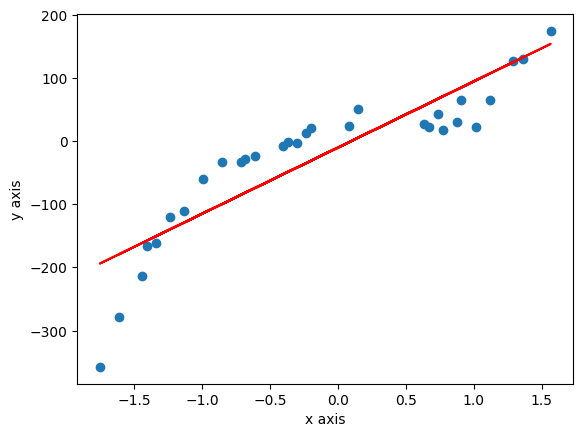

In [11]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred,color='red')
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.show("without polynomial features")

In [12]:
model.coef_

array([104.92600003])

In [13]:
model.intercept_

np.float64(-10.053998208964837)

Now apply polynomial

In [14]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3,include_bias=True)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [15]:
x_test_poly

array([[ 1.00000000e+00,  1.11676323e+00,  1.24716012e+00,
         1.39278257e+00],
       [ 1.00000000e+00,  7.99803907e-02,  6.39686289e-03,
         5.11623594e-04],
       [ 1.00000000e+00,  6.67490668e-01,  4.45543792e-01,
         2.97396323e-01],
       [ 1.00000000e+00, -1.96495034e-01,  3.86102984e-02,
        -7.58673188e-03],
       [ 1.00000000e+00, -2.31054462e-01,  5.33861644e-02,
        -1.23351115e-02],
       [ 1.00000000e+00, -4.03851602e-01,  1.63096117e-01,
        -6.58666281e-02],
       [ 1.00000000e+00, -9.91361880e-01,  9.82798376e-01,
        -9.74308846e-01],
       [ 1.00000000e+00,  1.01308495e+00,  1.02634111e+00,
         1.03977073e+00],
       [ 1.00000000e+00, -1.40607502e+00,  1.97704695e+00,
        -2.77987633e+00],
       [ 1.00000000e+00, -1.75166930e+00,  3.06834533e+00,
        -5.37472630e+00],
       [ 1.00000000e+00, -1.12959959e+00,  1.27599524e+00,
        -1.44136370e+00],
       [ 1.00000000e+00, -7.14886455e-01,  5.11062644e-01,
      

In [16]:
regression = LinearRegression()
model = regression.fit(x_train_poly,y_train)
y_pred_poly = model.predict(x_test_poly)

In [17]:
score = r2_score(y_test,y_pred_poly)

In [18]:
score

0.9840669275402011

In [19]:
regression.coef_

array([  0.        ,  12.90244841, -19.57538466,  49.79424763])

In [20]:
regression.intercept_

np.float64(11.145551729791617)

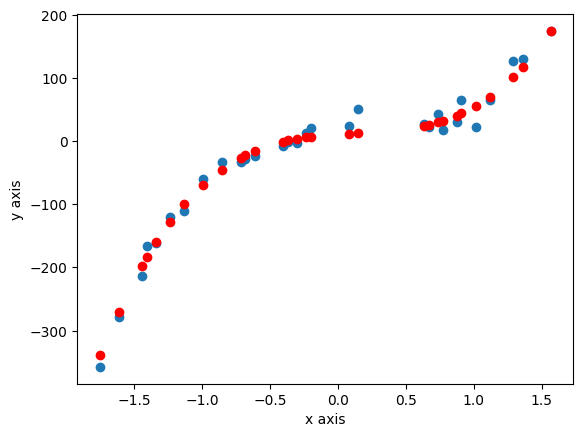

In [21]:
plt.scatter(x_test,y_test)
plt.scatter(x_test,y_pred_poly,color='red')
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.show("without polynomial features")